In [1]:
import pickle
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=8)
MDP of size 179 / 4 / 657 / 3.7

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=8, maximum_size=0, force_consider_own=True)
MDP of size 13921 / 4 / 72057 / 5.2


,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,rpp_minus_alpha
0,0.45,0.50,25,0.005,their,1,0.005168,0.005208,205,0,0.186548,15.313617,96,96,0.002849,0.609305,2,0.090432,1.593050e-01
1,0.45,0.50,25,0.005,our,1,0.005189,0.005208,259,0,29.289377,16.234850,559,559,0.119236,0.634684,2,0.570646,1.846839e-01
2,0.10,0.00,25,0.005,their,1,0.005138,0.005208,143,0,0.162147,2.362590,4,4,0.001479,0.100000,2,0.004740,-2.775558e-17
3,0.10,0.00,25,0.005,our,1,0.005079,0.005208,148,0,16.499331,2.373019,10,10,0.001206,0.100000,2,0.012032,9.436896e-16
4,0.35,1.00,25,0.001,their,1,0.001031,0.001042,304,0,0.345973,13.262379,104,104,0.003199,0.528087,2,0.107465,1.780873e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.05,0.25,100,0.001,our,1,0.001002,0.001010,780,0,47.313650,4.899755,10,10,0.000664,0.050000,2,0.005729,-4.163336e-17
596,0.20,0.50,100,0.001,their,1,0.001006,0.001010,991,0,0.684661,19.862194,4,4,0.000725,0.200000,2,0.002922,0.000000e+00
597,0.20,0.50,100,0.001,our,1,0.001002,0.001010,1056,0,52.925654,19.899821,10,9,0.000661,0.200000,2,0.005051,1.498801e-15
598,0.05,0.25,25,0.005,their,1,0.005002,0.005208,113,0,0.067846,1.122995,4,4,0.000767,0.050000,2,0.002857,-3.053113e-16


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0]

,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,rpp_minus_alpha
73,0.20,0.00,50,0.001,our,1,0.001005,0.001020,526,0,31.416665,9.949739,10,9,0.000893,0.200000,2,0.006736,1.498801e-15
75,0.20,0.50,25,0.005,our,1,0.005075,0.005208,182,0,19.208666,4.873124,10,9,0.001046,0.200000,2,0.009675,1.498801e-15
83,0.20,0.25,50,0.001,our,1,0.001005,0.001020,526,0,37.531162,9.949739,10,9,0.000831,0.200000,2,0.006506,1.498801e-15
89,0.20,0.00,25,0.005,our,1,0.005075,0.005208,182,0,13.768541,4.873124,10,9,0.000801,0.200000,2,0.006294,1.498801e-15
93,0.45,1.00,50,0.001,our,1,0.001014,0.001020,756,0,44.047857,37.463264,152,151,0.002519,0.766716,2,0.086570,3.167162e-01
109,0.20,0.00,100,0.001,our,1,0.001002,0.001010,1056,0,64.707468,19.899821,10,9,0.000772,0.200000,2,0.006266,1.498801e-15
167,0.45,1.00,50,0.005,our,1,0.005086,0.005102,540,0,31.733173,36.919967,152,151,0.002662,0.766716,2,0.091102,3.167162e-01
173,0.40,0.75,50,0.005,our,1,0.005096,0.005102,502,0,28.876734,29.119315,584,583,0.047545,0.476907,2,0.370558,7.690695e-02
203,0.20,0.00,100,0.005,our,1,0.005002,0.005051,736,0,49.767001,19.499797,10,9,0.000783,0.200000,2,0.006453,1.498801e-15
251,0.20,0.25,25,0.001,our,1,0.001033,0.001042,260,0,16.299972,4.974180,10,9,0.000751,0.200000,2,0.006327,1.498801e-15


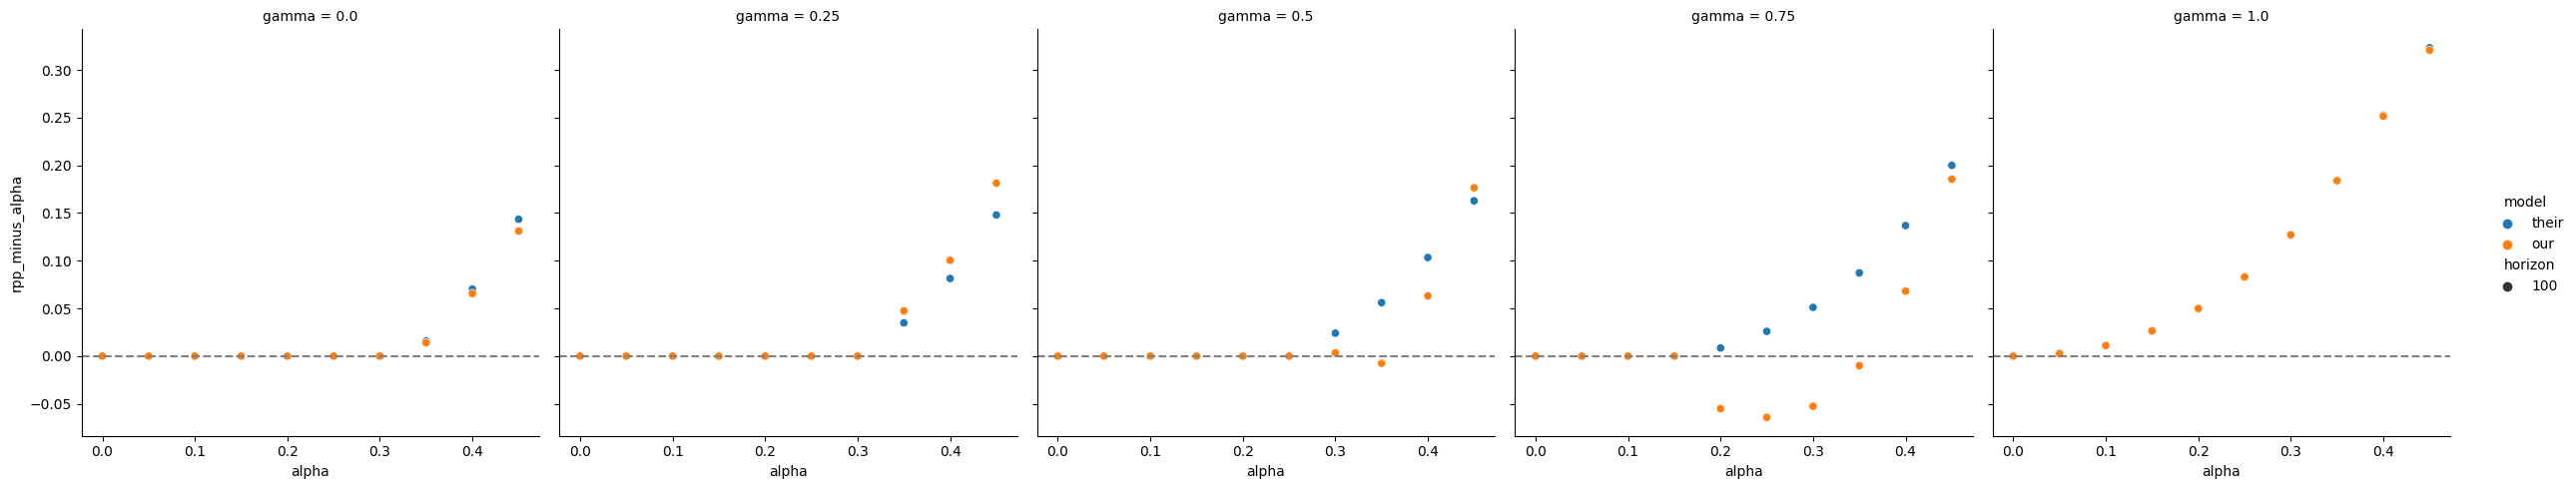

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    style="horizon",
    hue="model",
).refline(y=0)

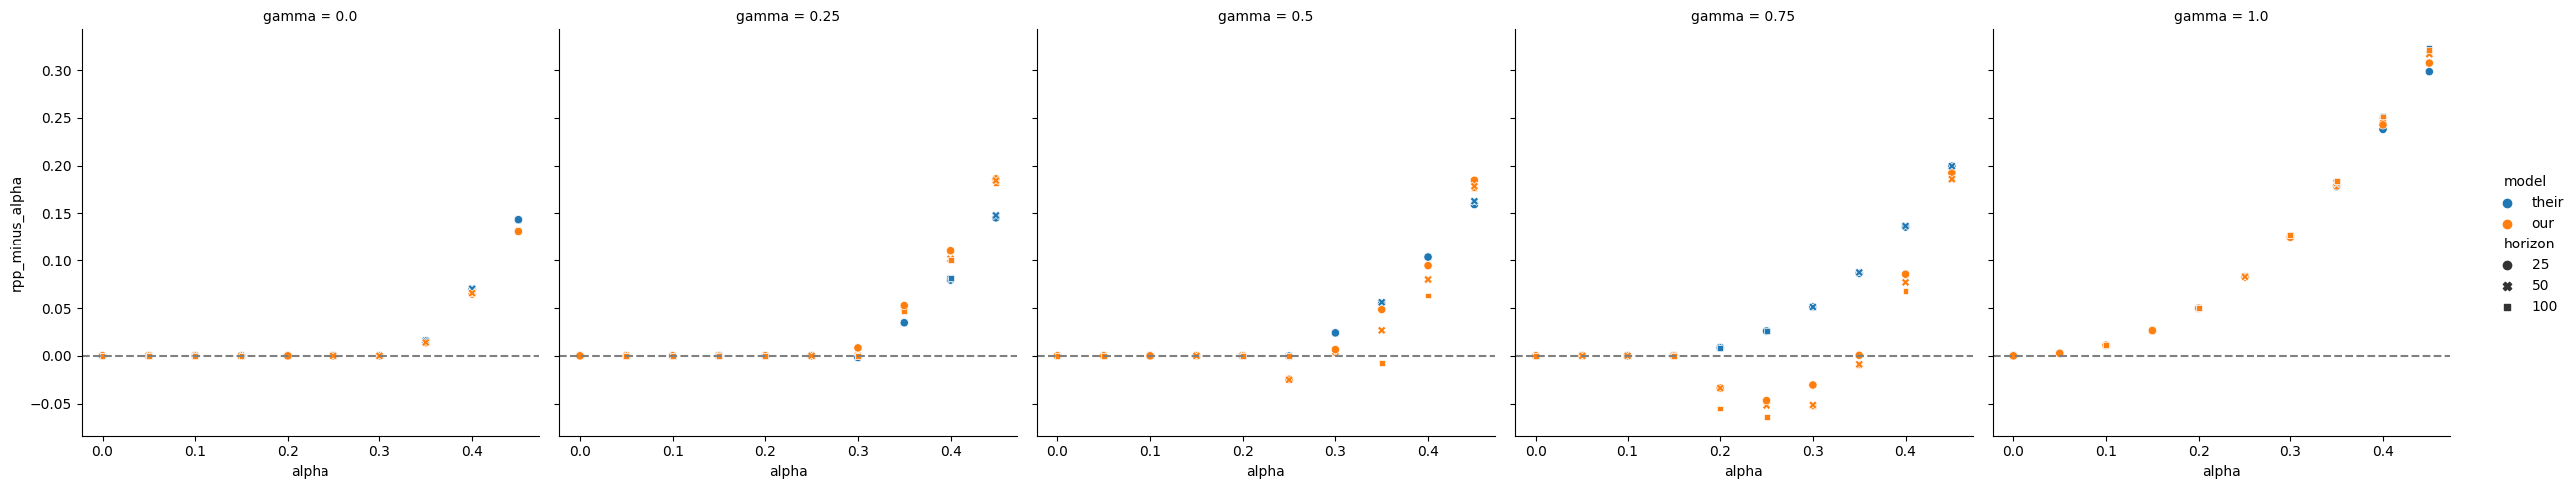

In [5]:
# Demonstrate effect of horizon
sns.relplot(
    data.query("eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="horizon",
).refline(y=0)

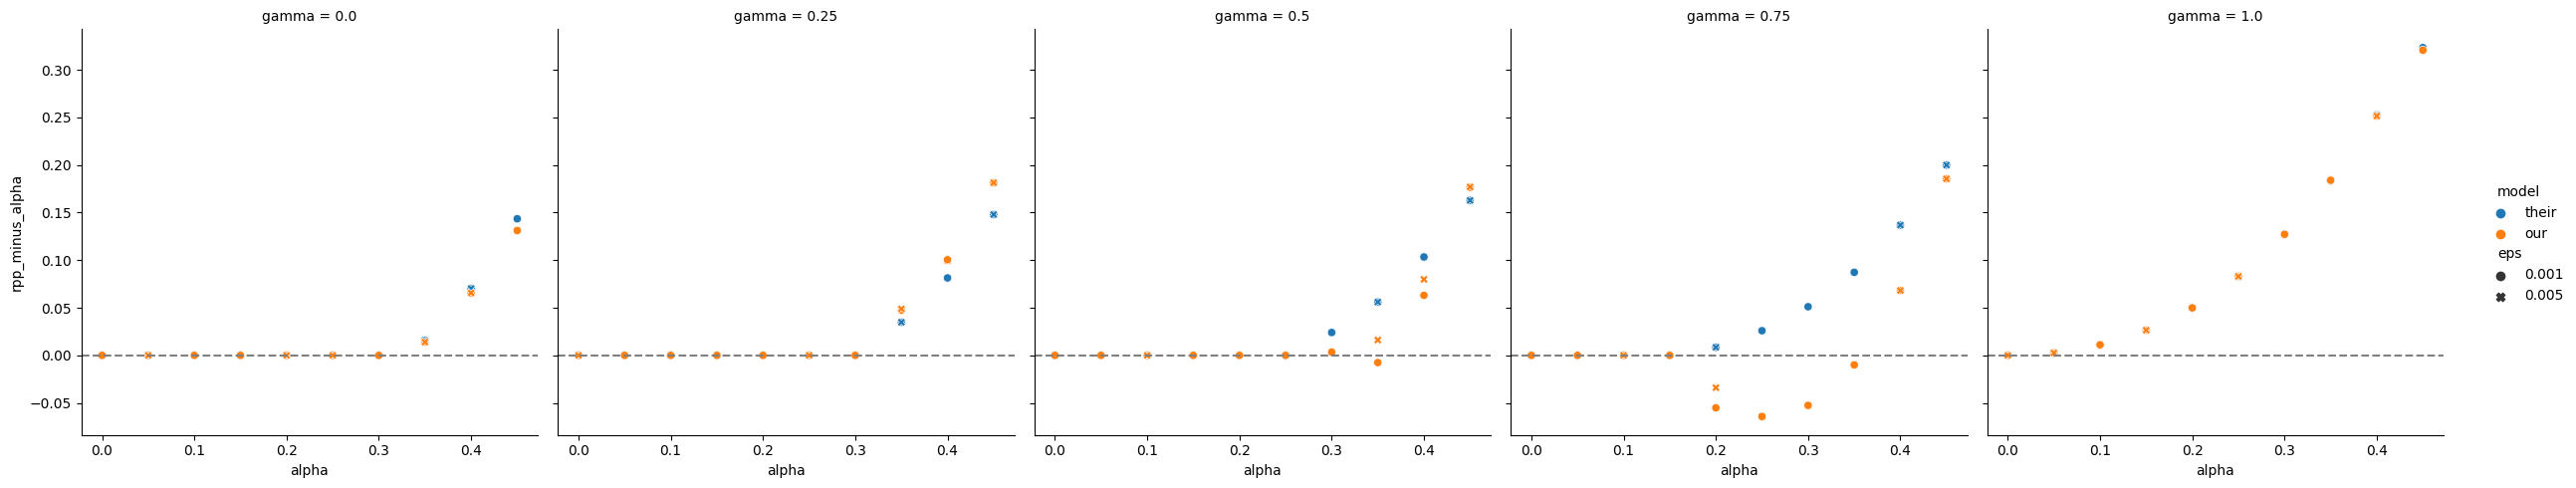

In [6]:
# Demonstrate effect of eps
sns.relplot(
    data.query("horizon==horizon.max()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="eps",
).refline(y=0)

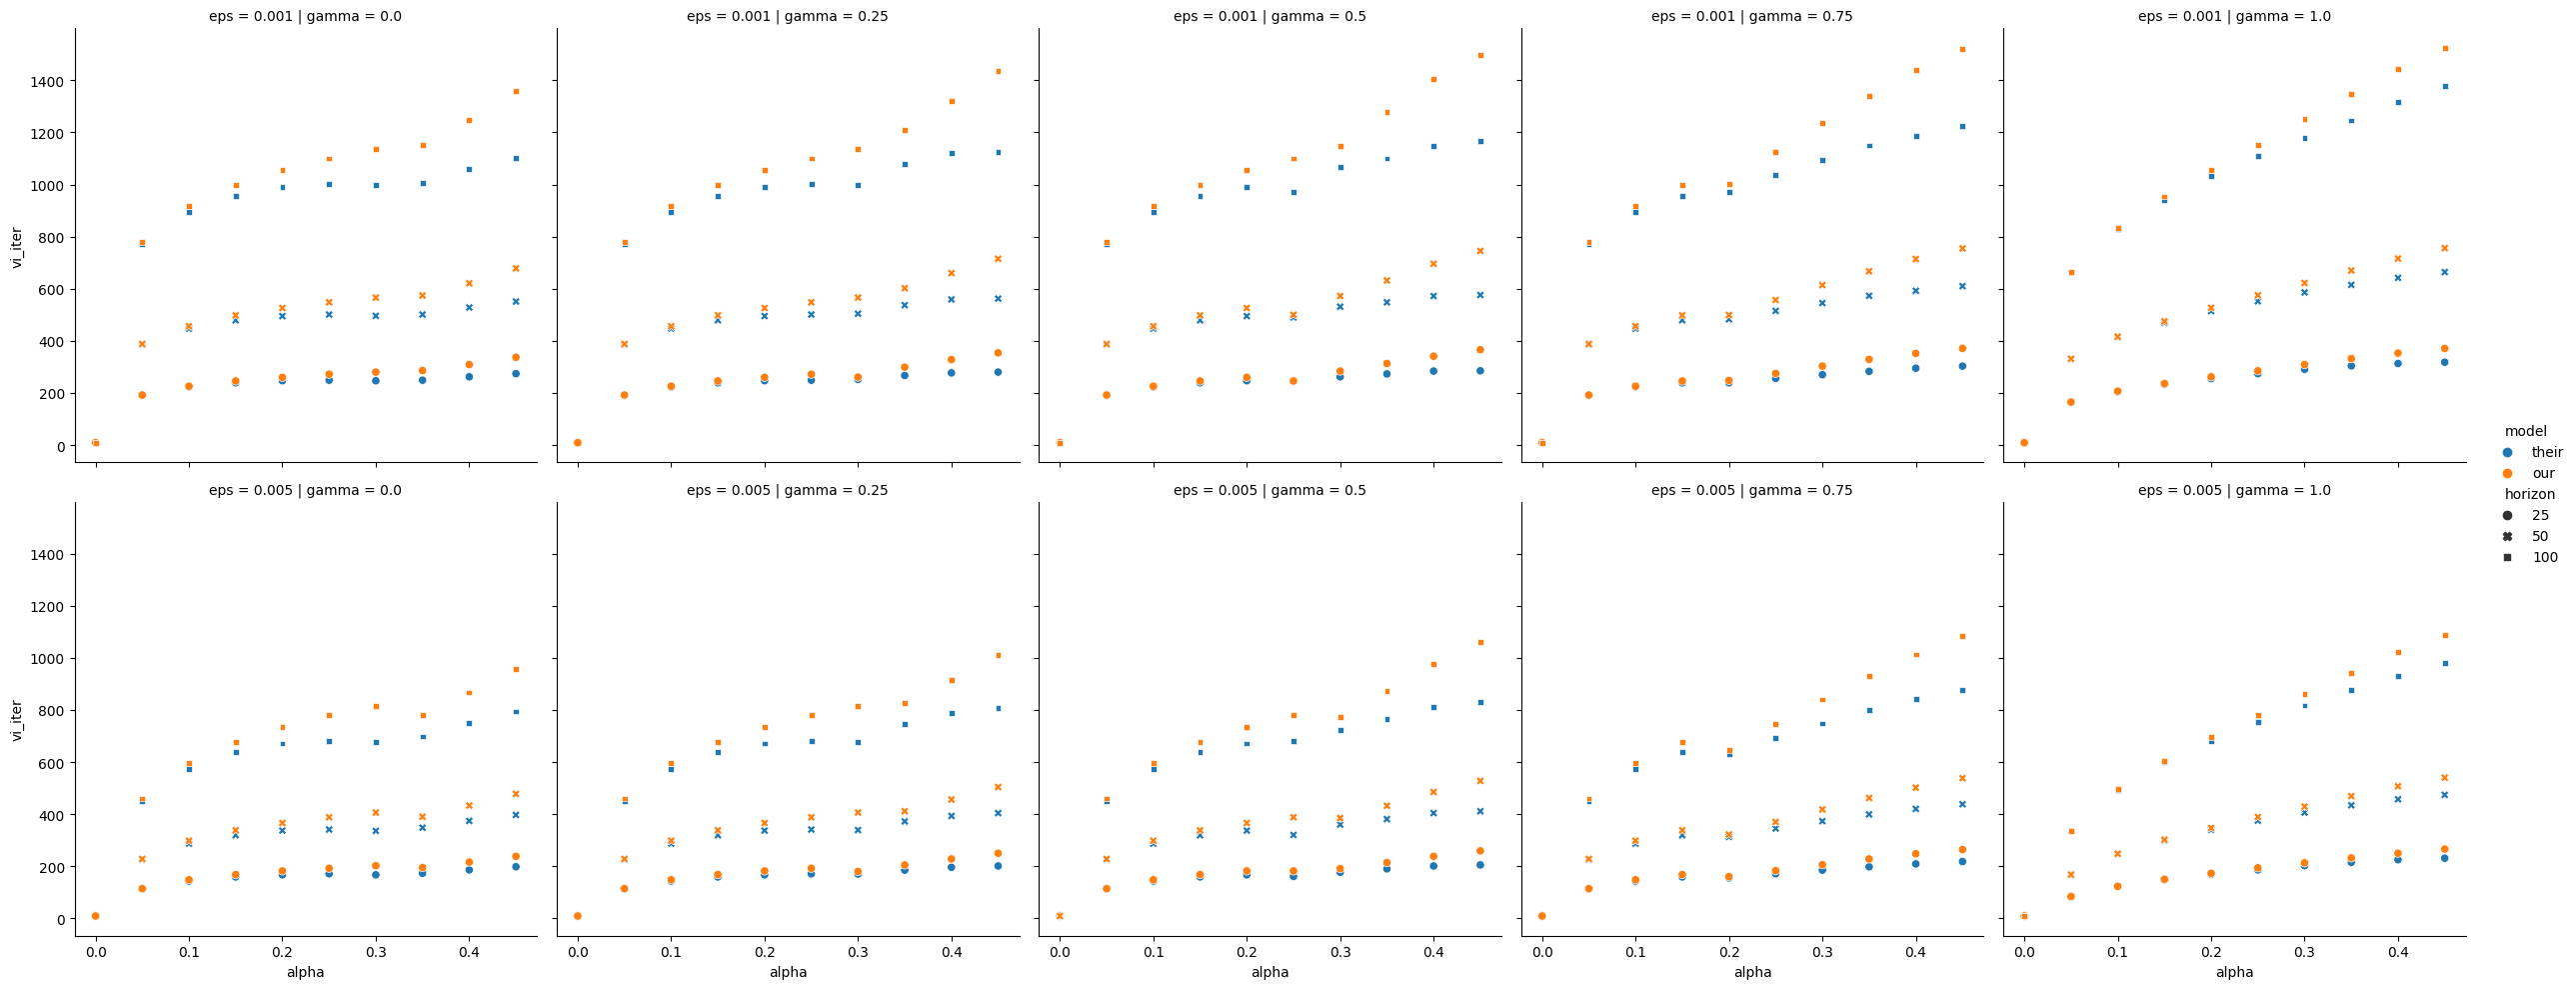

In [7]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="model",
    row="eps",
    style="horizon",
)

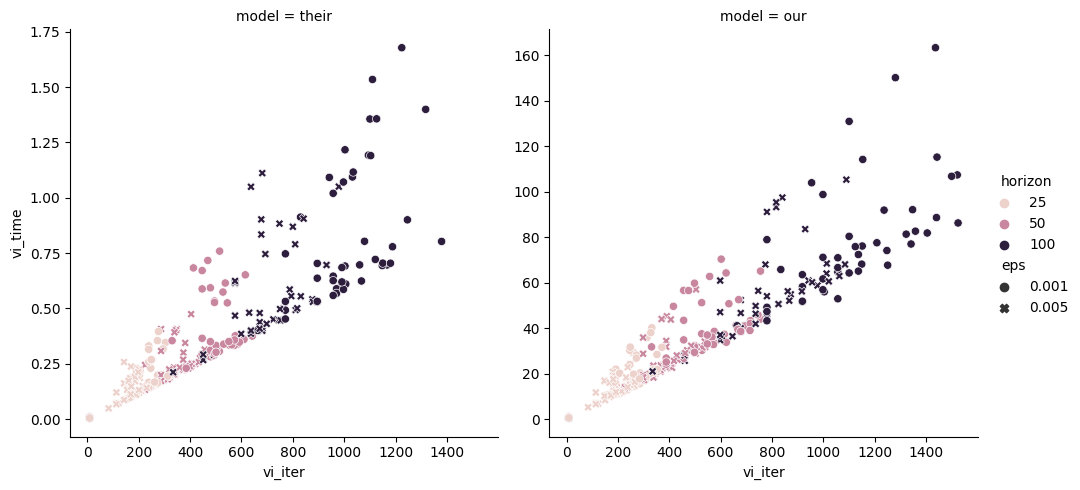

In [8]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="eps",
    col="model",
    facet_kws=dict(sharey=False),
)

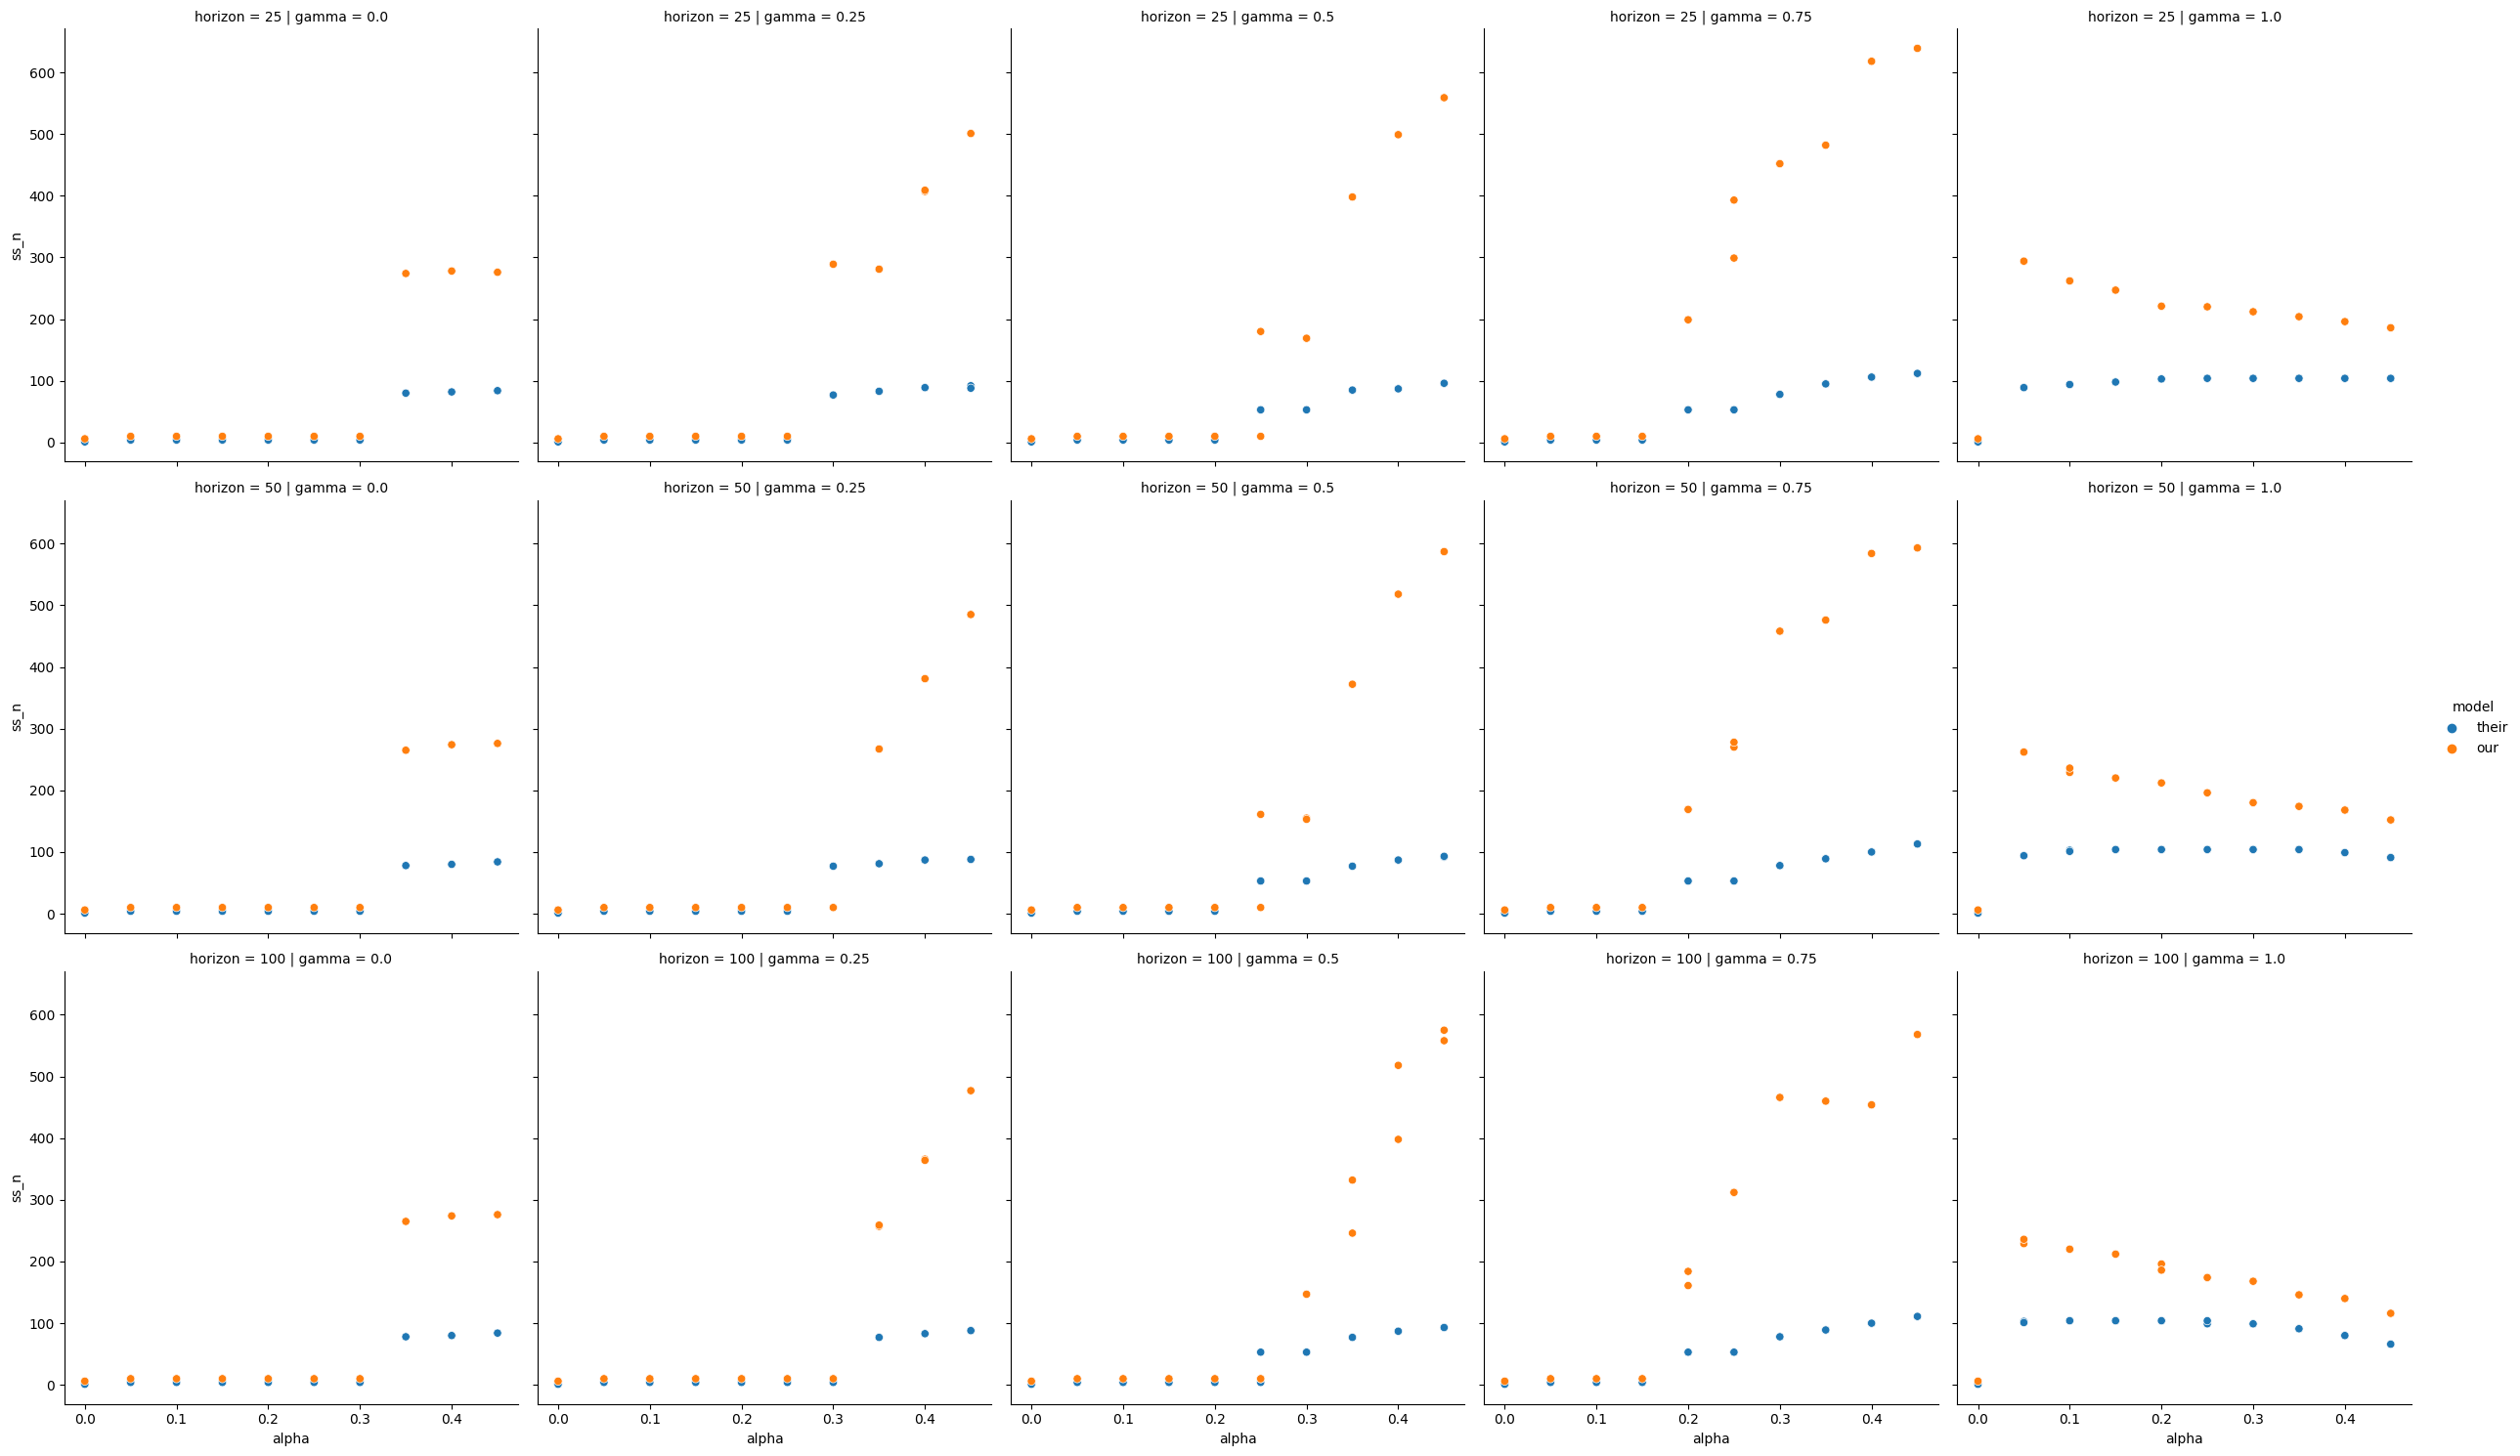

In [9]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="horizon",
    hue="model",
)

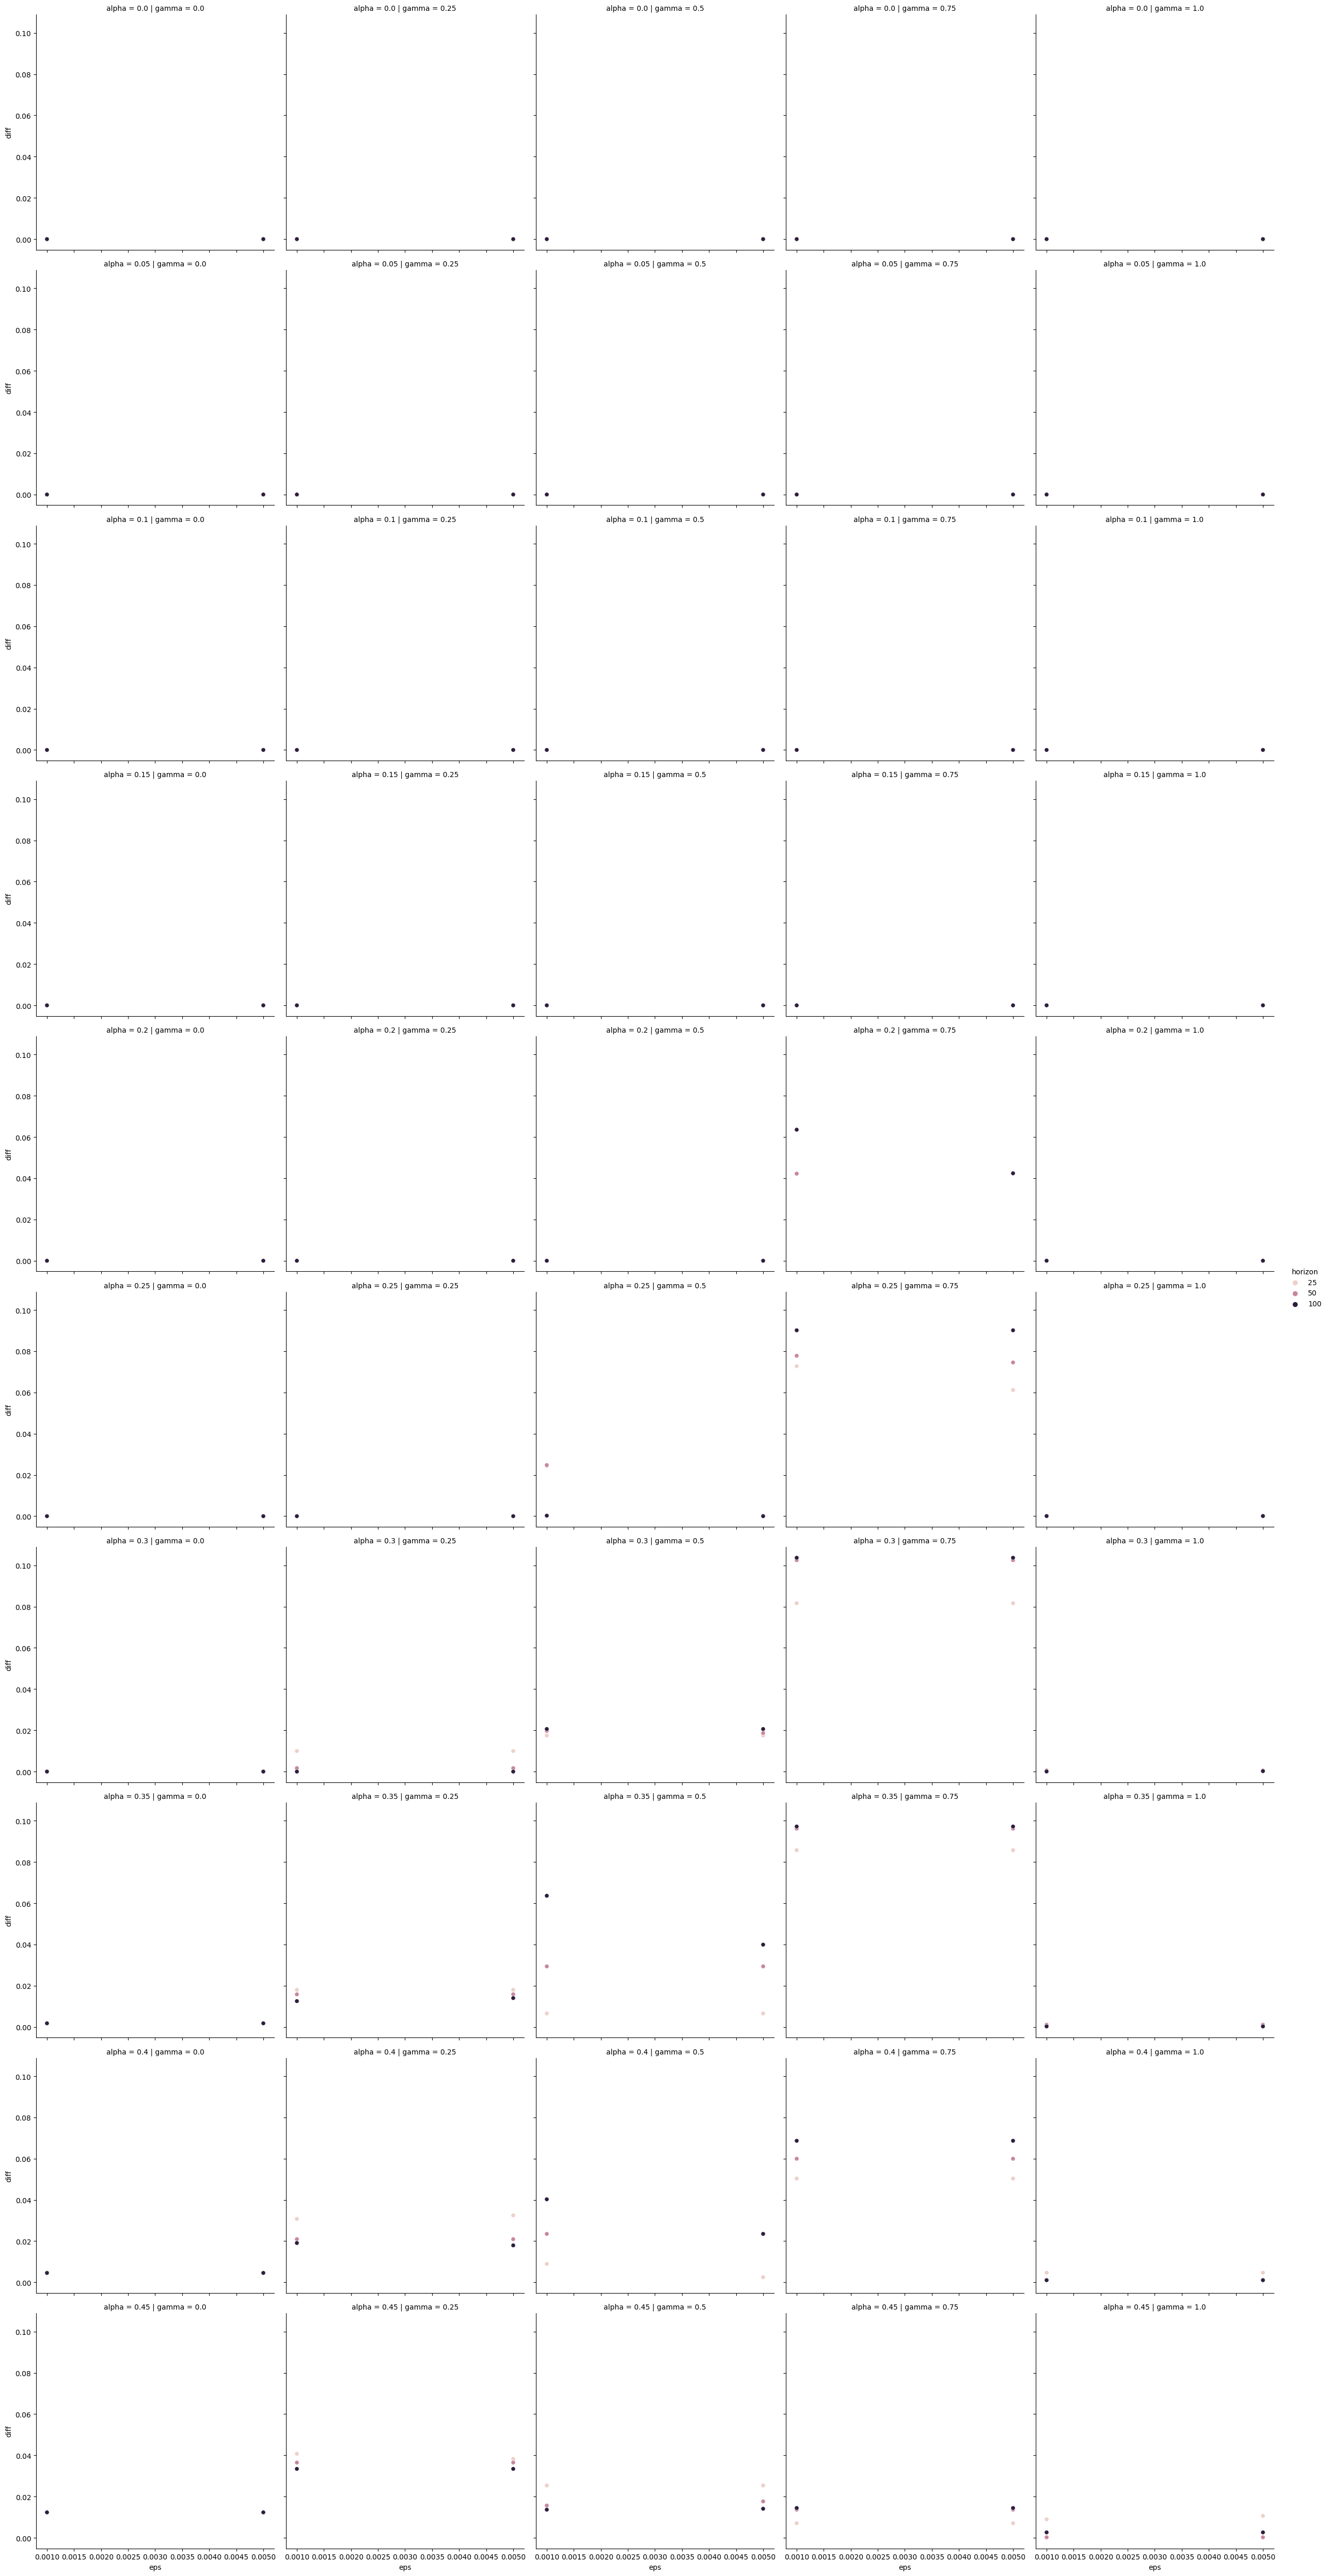

In [10]:
# We're now interested in the difference between the models
# Can we bring the differnce down by selecting better hyper params?
diff = data.pivot(
    index=["alpha", "gamma", "horizon", "eps"], columns="model", values=["rpp"]
)
diff.columns = [j for i, j in diff.columns]
diff["diff"] = (diff.their - diff.our).abs()
diff = diff.reset_index()
sns.relplot(
    data=diff,
    x="eps",
    y="diff",
    row="alpha",
    col="gamma",
    hue="horizon",
)

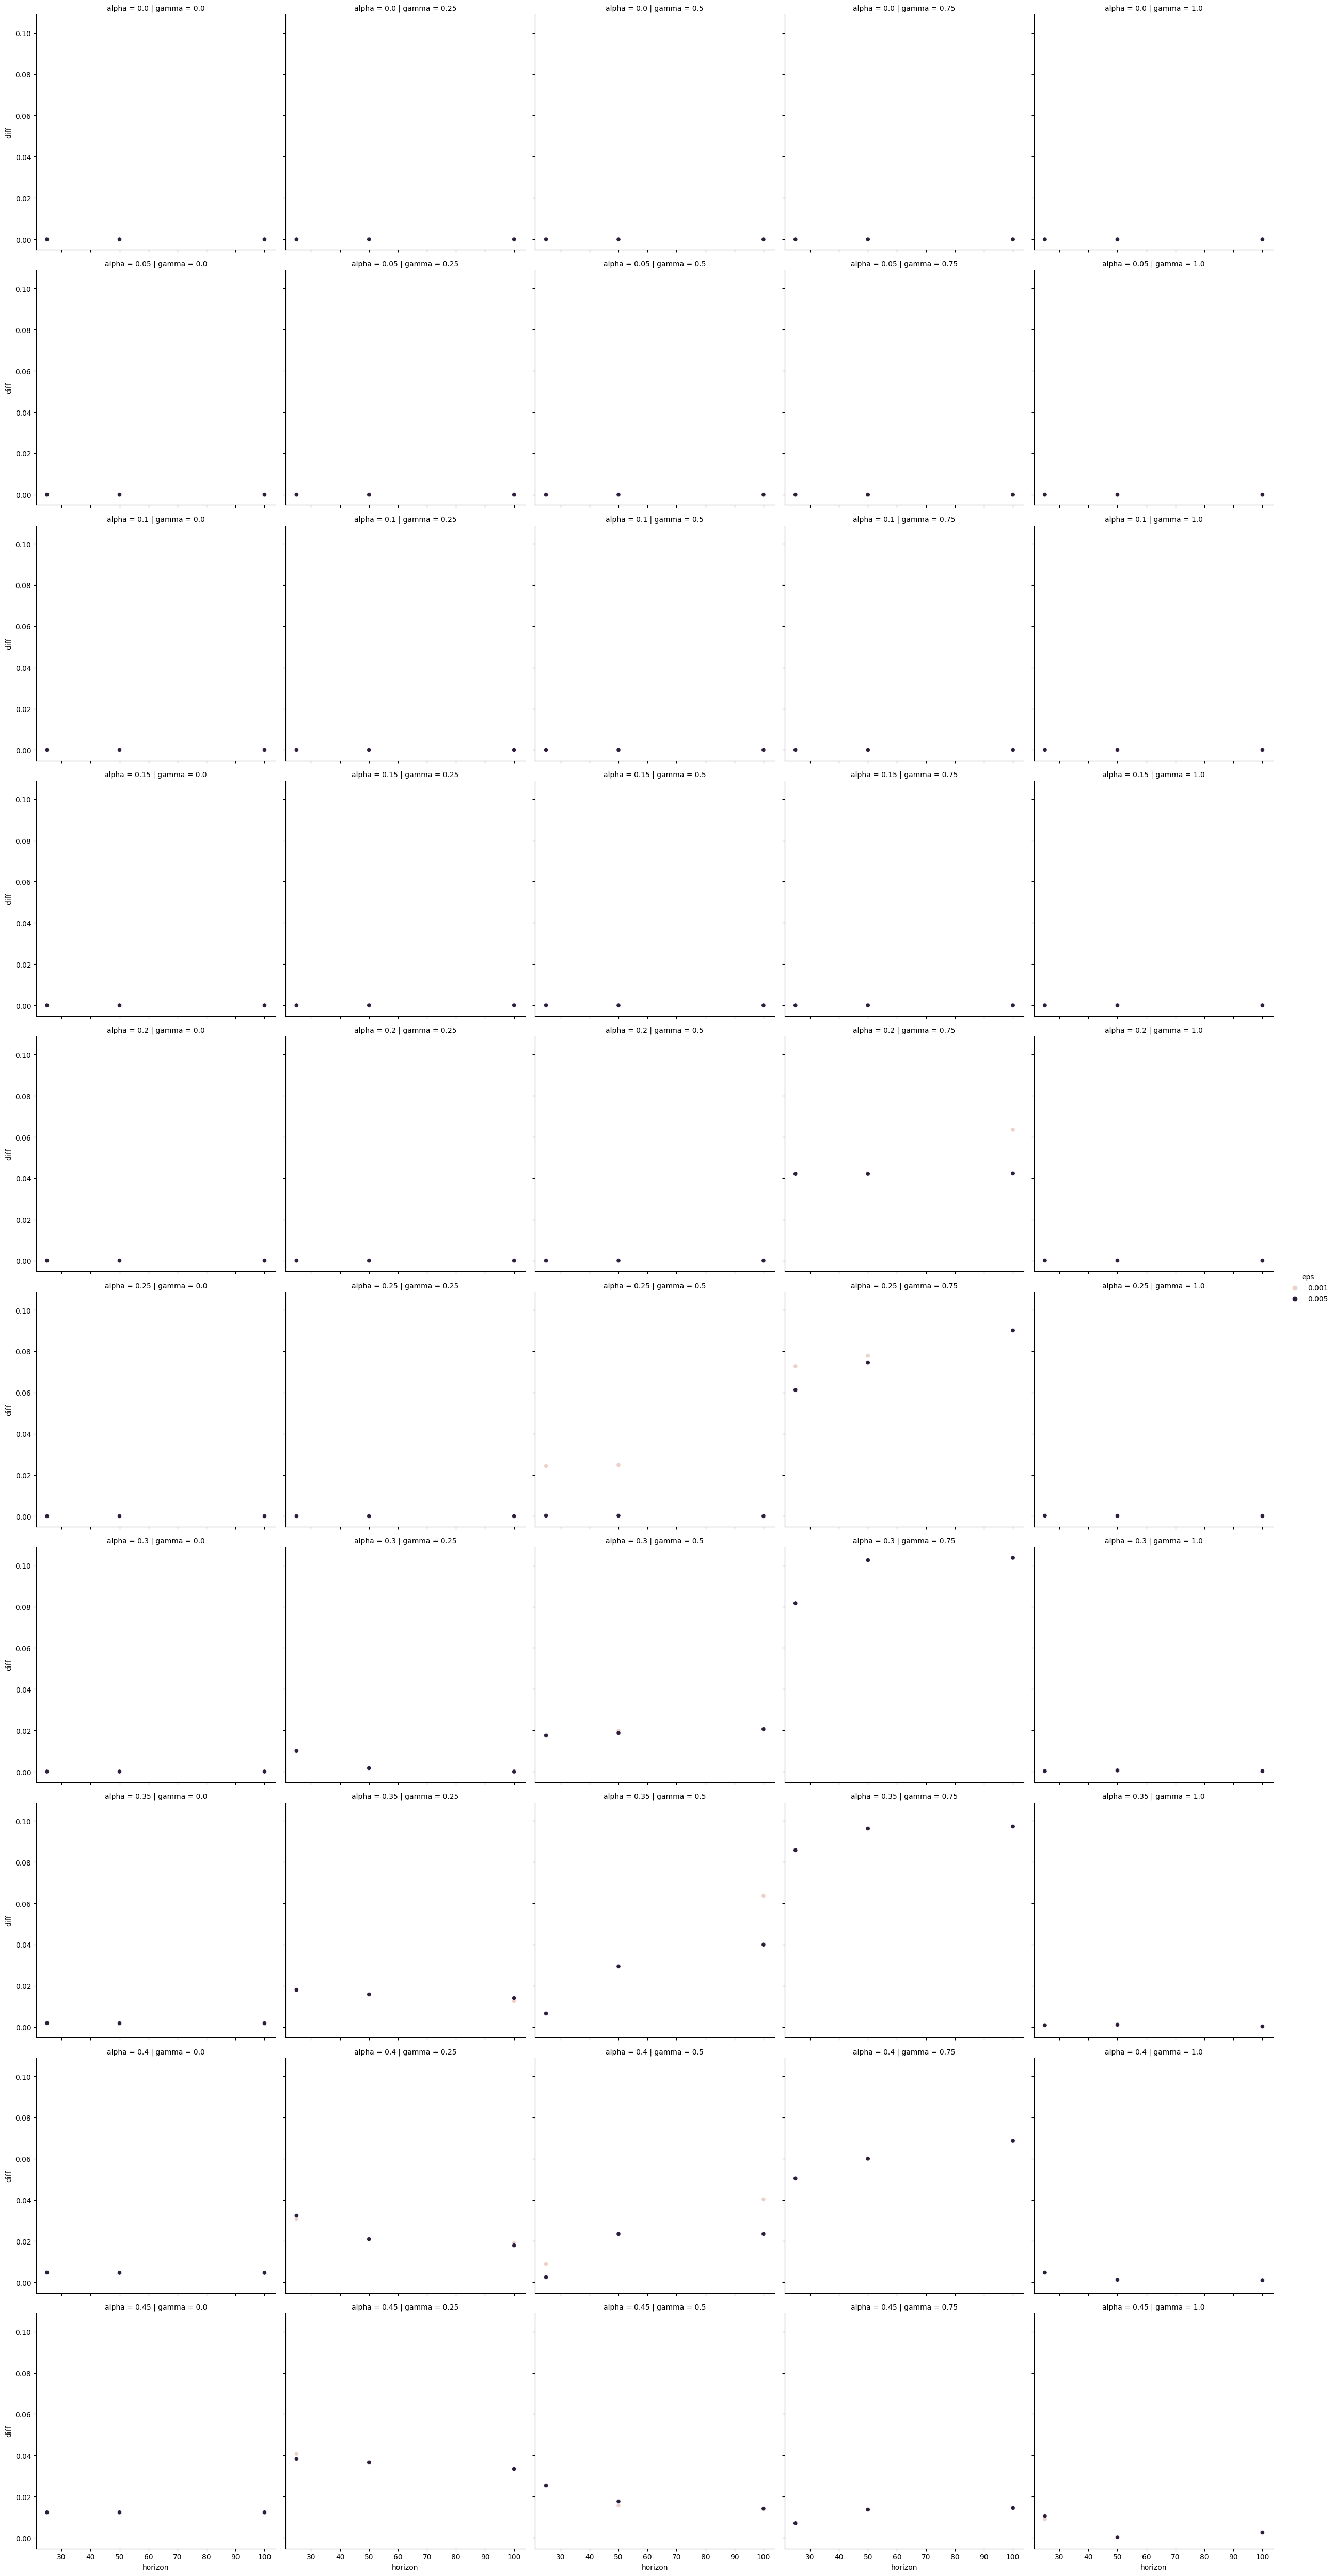

In [11]:
sns.relplot(
    data=diff,
    x="horizon",
    y="diff",
    row="alpha",
    col="gamma",
    hue="eps",
)

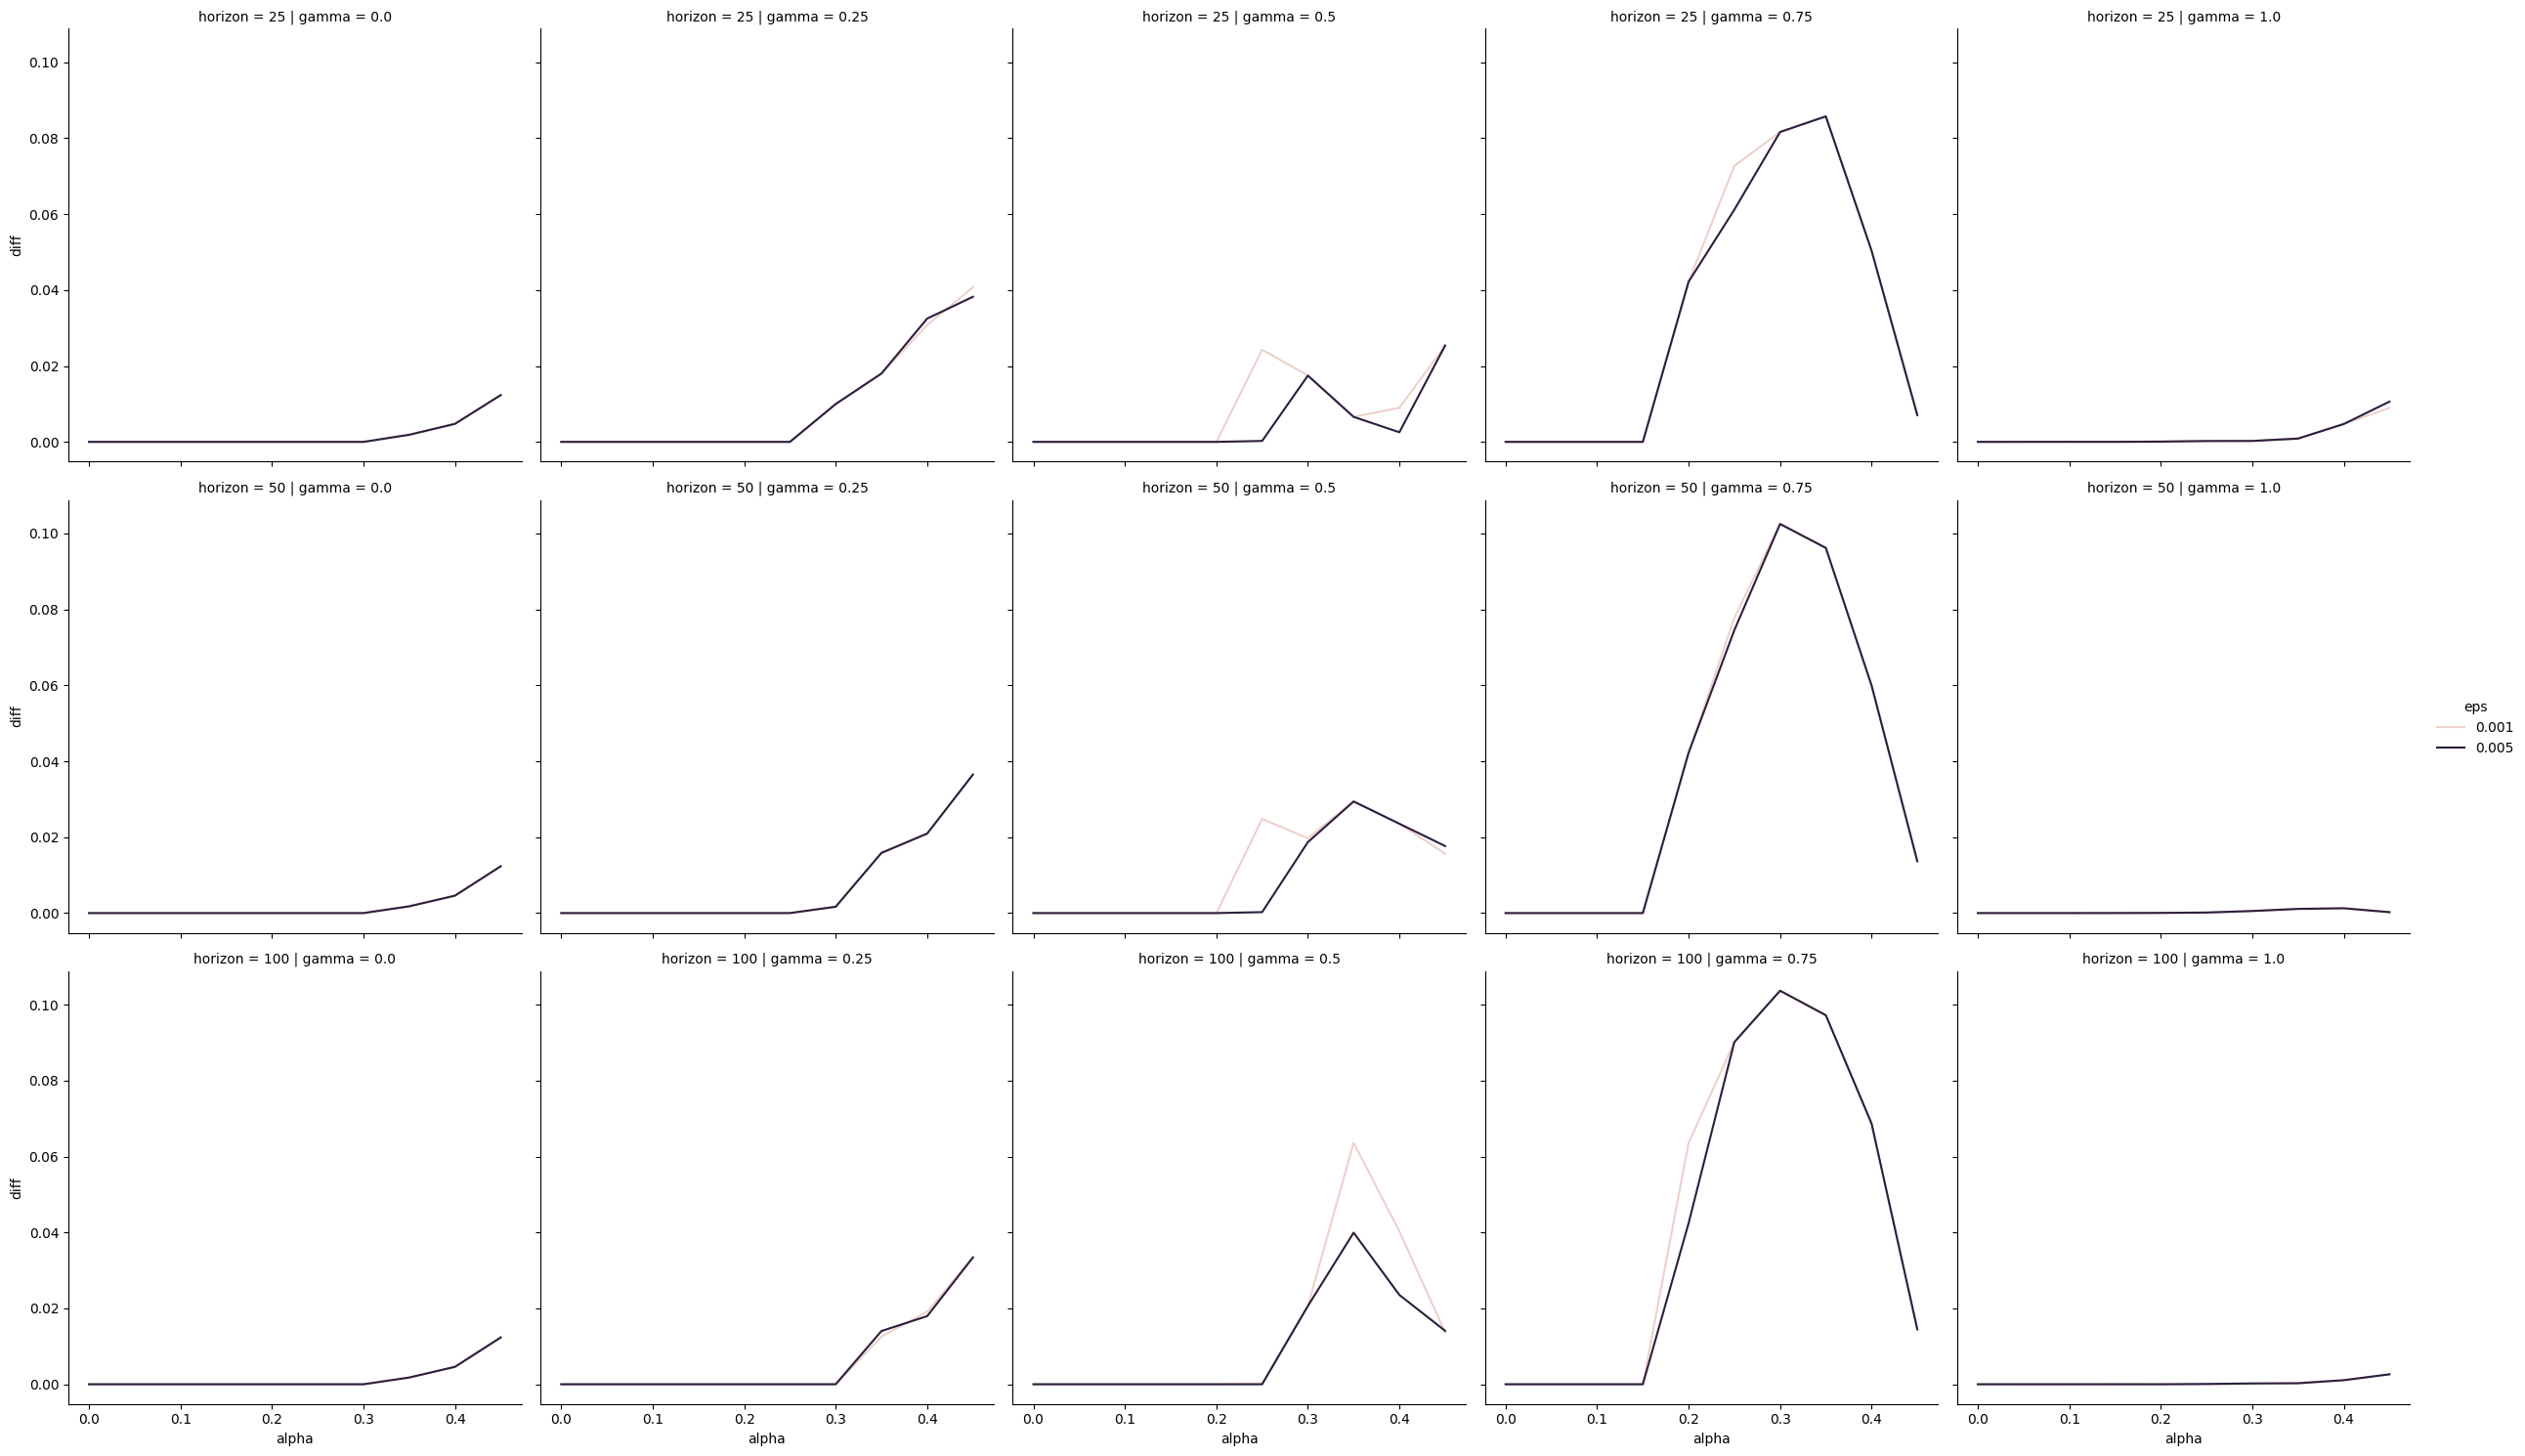

In [12]:
sns.relplot(
    kind="line",
    data=diff,
    x="alpha",
    y="diff",
    row="horizon",
    col="gamma",
    hue="eps",
)

In [13]:
ols = smf.ols("diff ~ alpha + gamma + eps + horizon", data=diff).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     15.84
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           9.34e-12
Time:                        15:11:22   Log-Likelihood:                 724.60
No. Observations:                 300   AIC:                            -1439.
Df Residuals:                     295   BIC:                            -1421.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0091      0.004     -2.152      0.0

In [14]:
# Now have a look at the cost of value iteration
ols = smf.ols("vi_iter ~ alpha + gamma + eps + horizon", data=data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                vi_iter   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     632.3
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          1.31e-212
Time:                        15:11:22   Log-Likelihood:                -3859.9
No. Observations:                 600   AIC:                             7730.
Df Residuals:                     595   BIC:                             7752.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.7287     20.658     -6.086      0.0